In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Entropy vs Probability

<ipython-input-2-2c0e93824d2d>:2: RuntimeWarning: divide by zero encountered in log2
  y = -x * np.log2(x) - (1-x) * np.log2(1-x)
<ipython-input-2-2c0e93824d2d>:2: RuntimeWarning: invalid value encountered in multiply
  y = -x * np.log2(x) - (1-x) * np.log2(1-x)


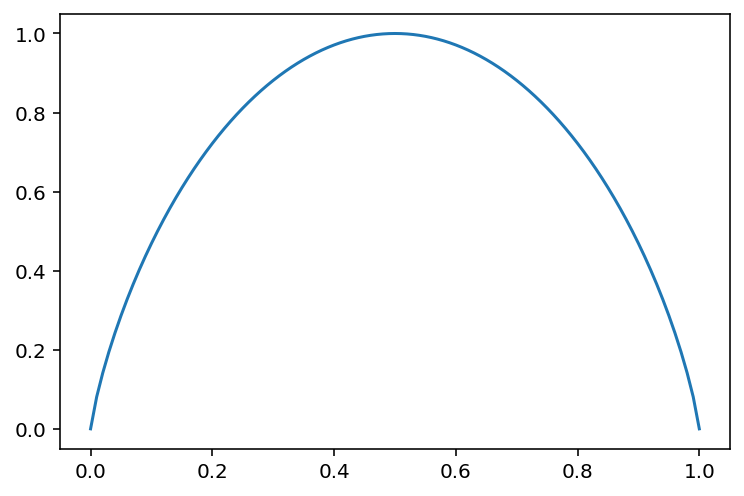

In [2]:
x = np.linspace(0, 1, 101)
y = -x * np.log2(x) - (1-x) * np.log2(1-x)
y[np.isnan(y)] = 0
plt.plot(x, y)

# KL Analysis

$$ KL(\mu_1, \sigma_1) = -log\sigma_1 + \frac{\sigma_1^2 + \sigma_2^2}{2} - \frac{1}{2} $$

1. $\sigma_1 > 1$, which side $\frac{1}{2} \sigma_1^2$ (increasing) and $-log\sigma_1$ (decreasing) will be more impact? 
2. $\sigma_1 < 1$,  which side $\frac{1}{2} \sigma_1^2$ (decreasing) and $-log\sigma_1$ (increasing) will be more impact? 

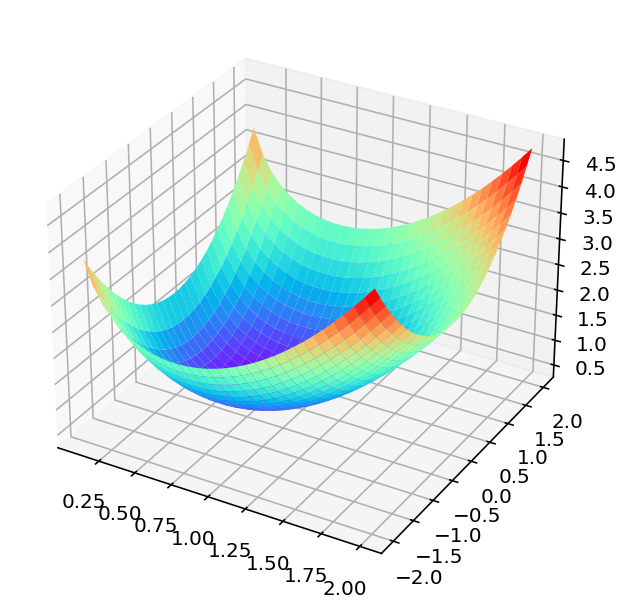

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
# don't start with 0, as it will lead to log(0) 
x = np.linspace(0.1, 2, 31)
y = np.linspace(-2, 2, 31)
X, Y = np.meshgrid(x, y)
Z = -np.log(X) + X*X + Y*Y / 2 - 0.5
# refer to https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# The rstride and cstride kwargs set the stride used to sample the input data to generate the graph. 
# If 1k by 1k arrays are passed in, the default values for the strides will result in a 100x100 grid being plotted. 
# Defaults to 10. Raises a ValueError if both stride and count kwargs (see next section) are provided.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

# Regression and Classification

/home/dluser1/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_informative=1, n_targets=1, bias=1.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


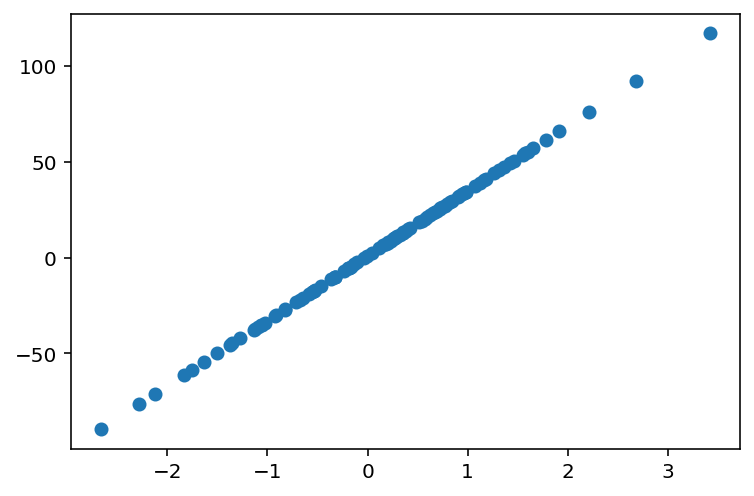

In [4]:
reg_data = d.make_regression(100, 1, 1, 1, 1.0)
plt.plot(reg_data[0], reg_data[1], 'o')

In [5]:
reg_data

(array([[ 0.72847695],
        [-1.832147  ],
        [-0.13083525],
        [ 1.16462997],
        [ 0.27002462],
        [ 0.82352225],
        [ 2.20964756],
        [ 0.29827216],
        [-0.23088574],
        [-1.09220015],
        [ 0.79157298],
        [-1.27172465],
        [ 0.51479273],
        [-0.10224082],
        [-1.34977157],
        [-2.28085319],
        [ 0.28768829],
        [-0.46910071],
        [-0.91553982],
        [-0.1952341 ],
        [ 0.15923692],
        [ 0.54148894],
        [-1.6306445 ],
        [ 0.74449223],
        [-0.00710495],
        [ 0.98872342],
        [-0.32899245],
        [-0.82770251],
        [-0.7156511 ],
        [ 0.59276275],
        [ 0.98488372],
        [ 1.77958636],
        [ 1.31612985],
        [-0.18077333],
        [-1.75887071],
        [ 1.36841235],
        [ 0.40572446],
        [-0.82118115],
        [ 0.95880364],
        [-0.58590814],
        [ 0.94578782],
        [-0.32634177],
        [ 0.04690678],
        [ 1

/home/dluser1/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_informative=2, n_redundant=0, n_repeated=0, n_classes=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


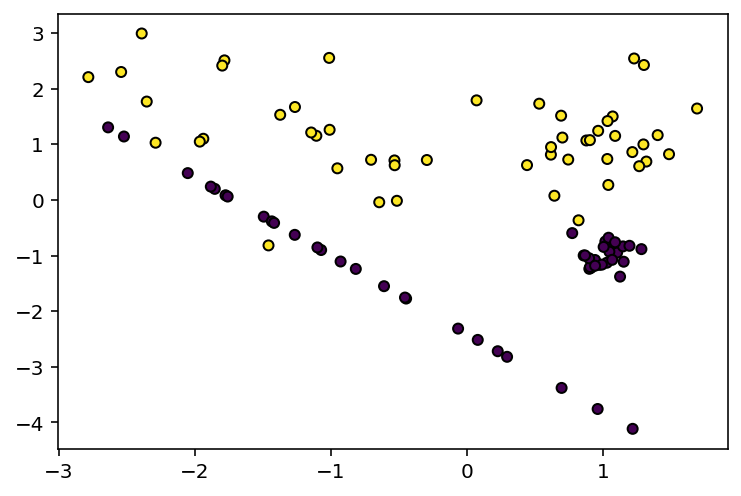

In [6]:
X1, Y1 = d.make_classification(100, 2, 2, 0, 0, 2)
## why plt.plot could paint the scatter graphic?
#  refer to http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

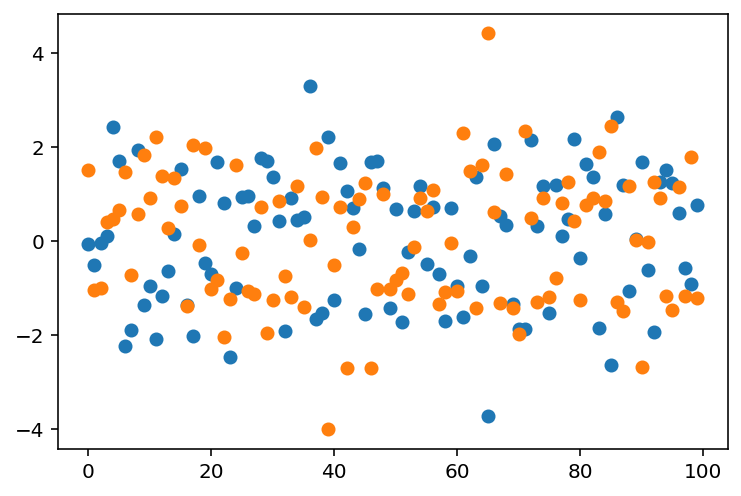

In [7]:
cls_data = d.make_classification(100, 2, 2, 0, 0, 2)
cls0, cls1 = plt.plot(cls_data[0], 'o')

# Bonouli Distribution

$P$ and $Q$ conform to Bonouli Distribution, How about cross-entropy?

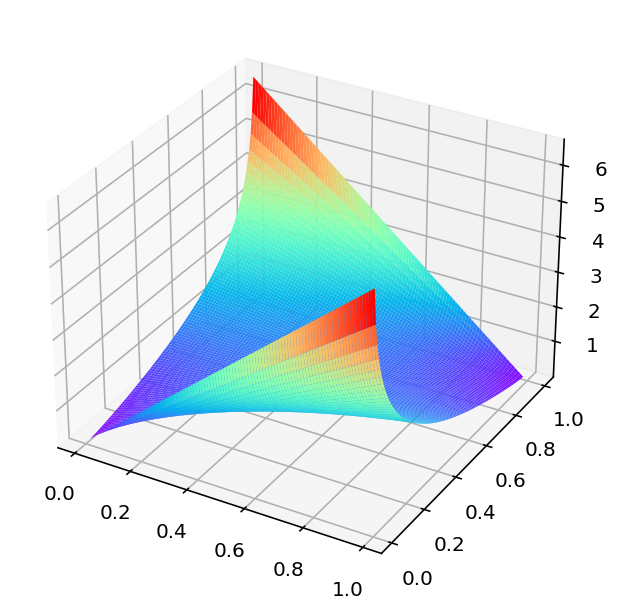

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0.01, 0.99, 101)
Y = np.linspace(0.01, 0.99, 101)
X, Y = np.meshgrid(X, Y)
Z = -X * np.log2(Y) - (1-X) * np.log2(1-Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')